In [20]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('dataa.csv')

# Convert 'date_time' column to datetime
dataset['date_time'] = pd.to_datetime(dataset['date_time'])
print("dataset['date_time'] :",dataset['date_time'])

# Sort the dataset by timestamp (if it's not already sorted)
dataset.sort_values(by='date_time', inplace=True)

# Optionally, set 'date_time' as the index
dataset.set_index('date_time', inplace=True)


dataset['date_time'] : 0        2019-08-17 00:00:01
1        2019-08-17 00:01:01
2        2019-08-17 00:02:01
3        2019-08-17 00:03:01
4        2019-08-17 00:04:01
                 ...        
619994   2020-12-17 03:13:01
619995   2020-12-17 03:14:02
619996   2020-12-17 03:15:02
619997   2020-12-17 03:16:01
619998   2020-12-17 03:17:02
Name: date_time, Length: 619999, dtype: datetime64[ns]


In [21]:
# Extract features from the timestamp
dataset['day_of_week'] = dataset.index.dayofweek
dataset['hour'] = dataset.index.hour

print("dataset['day_of_week']: ",dataset['day_of_week'])
print("dataset['hour']: ",dataset['hour'])
print(dataset.index.dayofweek)
print(dataset.index.hour)

dataset['day_of_week']:  date_time
2019-08-17 00:00:01    5
2019-08-17 00:01:01    5
2019-08-17 00:02:01    5
2019-08-17 00:03:01    5
2019-08-17 00:04:01    5
                      ..
2020-12-17 03:13:01    3
2020-12-17 03:14:02    3
2020-12-17 03:15:02    3
2020-12-17 03:16:01    3
2020-12-17 03:17:02    3
Name: day_of_week, Length: 619999, dtype: int64
dataset['hour']:  date_time
2019-08-17 00:00:01    0
2019-08-17 00:01:01    0
2019-08-17 00:02:01    0
2019-08-17 00:03:01    0
2019-08-17 00:04:01    0
                      ..
2020-12-17 03:13:01    3
2020-12-17 03:14:02    3
2020-12-17 03:15:02    3
2020-12-17 03:16:01    3
2020-12-17 03:17:02    3
Name: hour, Length: 619999, dtype: int64
Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='date_time', length=619999)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='date_

In [23]:
from sklearn.model_selection import train_test_split

X = dataset[['humidity', 'day_of_week', 'hour']]  # Features
y = dataset['temp']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train, X_test, y_train, y_test)

                     humidity  day_of_week  hour
date_time                                       
2019-12-21 23:10:01        95            5    23
2020-04-11 14:51:03        22            5    14
2020-08-02 05:07:01        19            6     5
2020-08-19 20:47:01        20            2    20
2020-06-25 00:03:01        34            3     0
...                       ...          ...   ...
2019-11-07 13:07:02        95            3    13
2020-03-10 14:03:01        19            1    14
2020-06-03 09:40:02        22            2     9
2019-11-25 18:04:01        95            0    18
2019-11-17 18:08:02        95            6    18

[495999 rows x 3 columns]                      humidity  day_of_week  hour
date_time                                       
2020-01-18 17:10:03        20            5    17
2020-02-13 08:08:02        20            3     8
2019-09-11 12:51:01        95            2    12
2020-03-16 08:01:01        20            0     8
2020-05-06 08:24:01        43            2

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor model
model = DecisionTreeRegressor()


In [25]:
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.6376512979090853
R-squared Score: 0.7261201846486461


In [29]:
# Prepare input data for prediction (replace with your own values)
new_data = pd.DataFrame({'humidity': [60], 'day_of_week': [9], 'hour': [14]})
print(new_data)
# Make a temperature prediction
predicted_temperature = model.predict(new_data)
print(f"Next Minute Temperature Predicted: {predicted_temperature[0]}")


   humidity  day_of_week  hour
0        60            9    14
Next Minute Temperature Predicted: 18.0


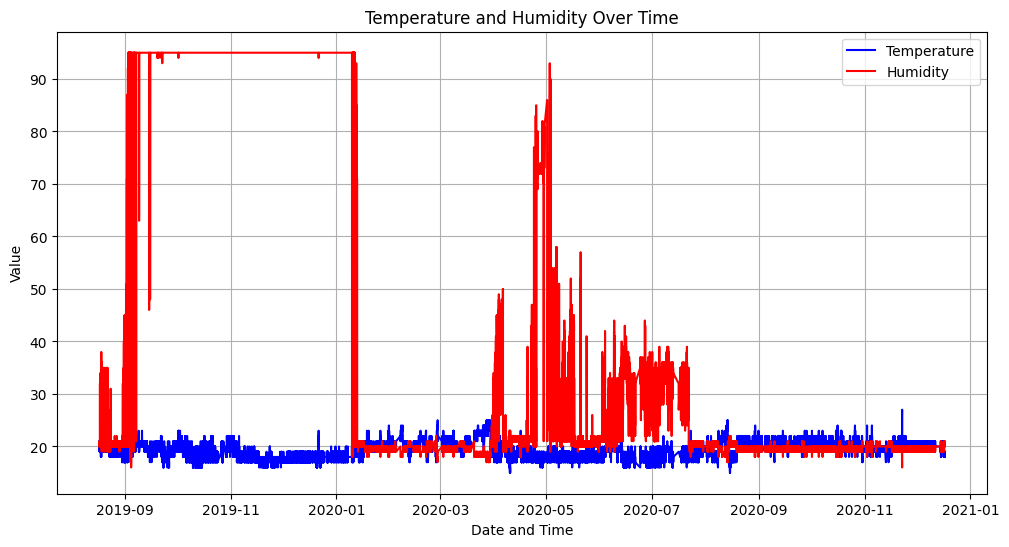

In [30]:
import matplotlib.pyplot as plt

# Visualize temperature and humidity
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['temp'], label='Temperature', color='blue')
plt.plot(dataset.index, dataset['humidity'], label='Humidity', color='red')
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Temperature and Humidity Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your historical temperature and humidity data as a Pandas DataFrame
# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('dataa.csv')

# Preprocess the data
scaler = MinMaxScaler()
data[['temp', 'humidity']] = scaler.fit_transform(data[['temp', 'humidity']])

# Define a function to prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps].values)
        y.append(data.iloc[i+n_steps]['temp'])  # Adjust for humidity if needed
    return np.array(X), np.array(y)

# Set the number of time steps for the LSTM model
n_steps = 5

# Prepare the data
X, y = prepare_data(data[['temp', 'humidity']], n_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 2)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Make predictions for the next minute
next_minute_data = data.tail(n_steps)
next_minute_data[['temp', 'humidity']] = scaler.transform(next_minute_data[['temp', 'humidity']])
X_next_minute = np.array([next_minute_data.values])
predicted_temperature = model.predict(X_next_minute)[0][0]

# Print the predicted temperature for the next minute
print('Next minute temperature prediction:', predicted_temperature)

# You can do the same for humidity if needed


Epoch 1/5
15500/15500 [==============================] - 59s 4ms/step - loss: 9.4716e-04
Epoch 2/5
15500/15500 [==============================] - 57s 4ms/step - loss: 7.9407e-04
Epoch 3/5
15500/15500 [==============================] - 58s 4ms/step - loss: 7.8663e-04
Epoch 4/5
15500/15500 [==============================] - 56s 4ms/step - loss: 7.8291e-04
Epoch 5/5
15500/15500 [==============================] - 56s 4ms/step - loss: 7.7785e-04


<ipython-input-21-c450d8efc54f>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_minute_data[['temp', 'humidity']] = scaler.transform(next_minute_data[['temp', 'humidity']])


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load your data from the CSV file
data = pd.read_csv('dataa.csv')

# Preprocess the data
scaler = MinMaxScaler()
data[['temp', 'humidity']] = scaler.fit_transform(data[['temp', 'humidity']])

# Define a function to prepare the data for LSTM
def prepare_data(data, n_steps):
    X, y_temp, y_humidity = [], [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps].values)
        y_temp.append(data.iloc[i+n_steps]['temp'])
        y_humidity.append(data.iloc[i+n_steps]['humidity'])
    return np.array(X), np.array(y_temp), np.array(y_humidity)

# Set the number of time steps for the LSTM model
n_steps = 5

# Prepare the data
X, y_temp, y_humidity = prepare_data(data[['temp', 'humidity']], n_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train_temp, y_test_temp = y_temp[:train_size], y_temp[train_size:]
y_train_humidity, y_test_humidity = y_humidity[:train_size], y_humidity[train_size:]

# Create and train an LSTM model for temperature
model_temp = Sequential()
model_temp.add(LSTM(50, activation='relu', input_shape=(n_steps, 2)))
model_temp.add(Dense(1))
model_temp.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_temp.fit(X_train, y_train_temp, epochs=5, batch_size=32, verbose=1)

# Create and train an LSTM model for humidity
model_humidity = Sequential()
model_humidity.add(LSTM(50, activation='relu', input_shape=(n_steps, 2)))
model_humidity.add(Dense(1))
model_humidity.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_humidity.fit(X_train, y_train_humidity, epochs=5, batch_size=32, verbose=1)

# Make predictions for the next minute for temperature and humidity
next_minute_data = data.tail(n_steps).copy()
next_minute_data[['temp', 'humidity']] = scaler.transform(next_minute_data[['temp', 'humidity']])
X_next_minute = np.array([next_minute_data.values])

# predicted_temperature = model_temp.predict(X_next_minute)[0][0]
# predicted_humidity = model_humidity.predict(X_next_minute)[0][0]

# # Print the predicted temperature and humidity for the next minute
# print('Next minute temperature prediction:', predicted_temperature)
# print('Next minute humidity prediction:', predicted_humidity)


Epoch 1/5
15500/15500 [==============================] - 60s 4ms/step - loss: 9.9921e-04
Epoch 2/5
15500/15500 [==============================] - 58s 4ms/step - loss: 7.9651e-04
Epoch 3/5
15500/15500 [==============================] - 58s 4ms/step - loss: 7.8823e-04
Epoch 4/5
15500/15500 [==============================] - 105s 7ms/step - loss: 7.8208e-04
Epoch 5/5
15500/15500 [==============================] - 58s 4ms/step - loss: 7.7727e-04
Epoch 1/5
15500/15500 [==============================] - 59s 4ms/step - loss: 0.0017
Epoch 2/5
15500/15500 [==============================] - 58s 4ms/step - loss: 8.8974e-04
Epoch 3/5
15500/15500 [==============================] - 58s 4ms/step - loss: 8.8168e-04
Epoch 4/5
15500/15500 [==============================] - 58s 4ms/step - loss: 8.7886e-04
Epoch 5/5
15500/15500 [==============================] - 58s 4ms/step - loss: 8.7636e-04


ValueError: ignored

In [ ]:
print(model_temp)
# predicted_temperature = model_temp.predict(X_next_minute)[0][0]
# predicted_humidity = model_humidity.predict(X_next_minute)[0][0]

# # Print the predicted temperature and humidity for the next minute
# print('Next minute temperature prediction:', predicted_temperature)
# print('Next minute humidity prediction:', predicted_humidity)
